## Case 3: Isolation of one of the areas from main grid


Single Line Diagram of system

![alt text](case3.png "Title")

Importing Data and packages

In [32]:
import pandas as pd
import networkx as nx
import numpy as np
import params as params
import matplotlib.pyplot as plt

from pypower.api import ppoption, runpf, case30

grid = case30()
ppopt = ppoption(PF_ALG=1)

line_data = pd.DataFrame(grid['branch'],
                     columns=['fbus', 'tbus', 'r', 'x', 'b', 'rateA', 'rateB', 'rateC', 'ratio', 'angle', 'status', 'angmin', 'angmax'])
line_data = line_data.astype({'fbus': int, 'tbus': int, 'status': int})

bus_data = pd.DataFrame(grid['bus'],
                        columns=['bus_i', 'type', 'Pd', 'Qd', 'Gs', 'Bs', 'area', 'Vm', 'Va', 'baseKV', 'zone', 'Vmax', 'Vmin'])
bus_data = bus_data.astype({'bus_i': int, 'type': int})

gen_data = pd.DataFrame(grid['gen'], columns=['bus', 'Pg', 'Qg', 'Qmax', 'Qmin', 'Vg', 'mBase', 'status', 'Pmax', 'Pmin', 'Pc1', 'Pc2',
     'Qc1min', 'Qc1max', 'Qc2min', 'Qc2max', 'ramp_agc', 'ramp_10', 'ramp_30', 'ramp_q', 'apf'])
gen_data = gen_data.astype({'bus': int, 'status': int})

DERs = set(gen_data['bus'])
CLs = set(bus_data['bus_i'][bus_data['Pd'] > 10])

line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.02,0.06,0.03,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
1,1,3,0.05,0.19,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
2,2,4,0.06,0.17,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
3,3,4,0.01,0.04,0.00,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
4,2,5,0.05,0.20,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
5,2,6,0.06,0.18,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
6,4,6,0.01,0.04,0.00,90.0,90.0,90.0,0.0,0.0,1,-360.0,360.0
7,5,7,0.05,0.12,0.01,70.0,70.0,70.0,0.0,0.0,1,-360.0,360.0
8,6,7,0.03,0.08,0.01,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
9,6,8,0.01,0.04,0.00,32.0,32.0,32.0,0.0,0.0,1,-360.0,360.0


In [33]:
# all_poss = []

# def backtrack(start):
#     if start == 20: return
#     grid['branch'] = line_data.values
#     pf_res, success = runpf(grid)
#     if success:
#         cur = line_data.index[line_data['status'] == 0].to_list()
#         all_poss.append(cur)
#     for i in range(start, 20):
#         line_data.loc[i, 'status'] = 0
#         backtrack(i+1)
#         line_data.loc[i, 'status'] = 1
# backtrack(9)
# mx = max([len(p) for p in all_poss])
# for p in all_poss:
#     if len(p) == mx:
#         print(p)

Possible switching combinations for stable operation of grid

In [34]:
[0, 2, 3, 7, 8, 10]
[0, 2, 3, 7, 9, 10]
[0, 2, 3, 8, 9, 10]
[0, 2, 4, 7, 8, 10]
[0, 2, 4, 8, 9, 10]
[0, 3, 4, 7, 8, 10]
[0, 3, 5, 7, 8, 10]
[0, 3, 5, 8, 9, 10]
[0, 3, 6, 7, 8, 10]
[0, 4, 5, 7, 8, 10]
[0, 5, 6, 7, 8, 10]
[1, 2, 3, 7, 8, 10]
[1, 2, 4, 6, 8, 10]
[1, 2, 4, 7, 8, 10]
[1, 2, 4, 8, 9, 10]
[1, 2, 6, 7, 8, 10]
[1, 2, 6, 7, 9, 10]
[1, 2, 6, 8, 9, 10]
[1, 3, 4, 6, 8, 10]
[1, 3, 4, 7, 8, 10]
[1, 3, 4, 8, 9, 10]
[1, 3, 5, 7, 8, 10]
[1, 3, 5, 8, 9, 10]
[1, 3, 6, 7, 8, 10]
[1, 3, 6, 8, 9, 10]
[1, 4, 5, 6, 8, 10]
[1, 4, 5, 7, 8, 10]
[1, 4, 5, 7, 9, 10]
[1, 4, 5, 8, 9, 10]
[1, 5, 6, 7, 8, 10]
[1, 5, 6, 7, 9, 10]
[1, 5, 6, 8, 9, 10]
[2, 4, 6, 7, 8, 10]
[2, 4, 6, 7, 9, 10]
[2, 4, 6, 8, 9, 10]
[3, 4, 5, 7, 8, 10]
[3, 4, 5, 8, 9, 10]
[3, 4, 6, 7, 8, 10]
[3, 4, 6, 8, 9, 10]
[4, 5, 6, 7, 8, 10]
[4, 5, 6, 7, 9, 10]
[4, 5, 6, 8, 9, 10]

[4, 5, 6, 8, 9, 10]


#### Modification to the standard 30 bus, 6 generator system:
`Switch in the line between bus [(6, 10), (9, 10), (4, 12), (10, 20), (10, 17)] is changed to open from closed.`


In [35]:
line_data.loc[[11, 13, 14, 24, 25], 'status'] = 0
grid['branch'] = line_data.values
line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.02,0.06,0.03,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
1,1,3,0.05,0.19,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
2,2,4,0.06,0.17,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
3,3,4,0.01,0.04,0.00,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
4,2,5,0.05,0.20,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
5,2,6,0.06,0.18,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
6,4,6,0.01,0.04,0.00,90.0,90.0,90.0,0.0,0.0,1,-360.0,360.0
7,5,7,0.05,0.12,0.01,70.0,70.0,70.0,0.0,0.0,1,-360.0,360.0
8,6,7,0.03,0.08,0.01,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
9,6,8,0.01,0.04,0.00,32.0,32.0,32.0,0.0,0.0,1,-360.0,360.0


Verifying normal operation of system after change using power flow calculation

In [36]:
pf_res, success = runpf(grid)
print('power flow converged') if success else print('power flow did not converge')

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power flow converged in 4 iterations.

Converged in 0.01 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0         -95.0 to 405.9
Generators         6     On-line Capacity       335.0         -95.0 to 405.9
Committed Gens     6     Generation (actual)    192.8             103.0
Loads             20     Load                   189.2             107.2
  Fixed           20       Fixed                189.2             107.2
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          41     Losses (I^2 * Z)         3.63             11.47
Transformers       0     Branc

Adding edges and weights to graph

In [37]:
from utilities import Utils
utils = Utils()
G, status = utils.make_graph(line_data)


Calculating N-1 and N-2 branch resiliency of the network

In [38]:
# Calculation of N-1 branch resiliency
edges = G.edges
networks = []
for u, v in edges:
    G.remove_edge(u, v)
    networks.append(list(G.edges))
    G.add_edge(u, v)

rsl = params.ratio_source_load(networks, CLs, DERs)
ops = params.switch_ops(networks, status)
cen = params.agg_centrality(networks)
obs = params.overlapping_branches(networks)
apl = params.avg_path_length(networks)

df = pd.DataFrame(np.array([rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
df.index = ['rsl', 'ops', 'cen', 'obs', 'apl']
df = df.T
df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
df['resiliency'] = np.exp(-df['wtd_mean'])
print('Resiliency of network considering N-1 branches: ', np.average(df['resiliency']))

# Calculation of N-2 branch Resiliency
networks = []
for i, (u, v) in enumerate(edges):
    G.remove_edge(u, v)
    for j, (l, r) in enumerate(edges):
        if i == j: continue
        G.remove_edge(l, r)
        networks.append(list(G.edges))
        G.add_edge(l, r)
    G.add_edge(u, v)

rsl = params.ratio_source_load(networks, CLs, DERs)
ops = params.switch_ops(networks, status)
cen = params.agg_centrality(networks)
obs = params.overlapping_branches(networks)
apl = params.avg_path_length(networks)

df = pd.DataFrame(np.array([rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
df.index = ['rsl', 'ops', 'cen', 'obs', 'apl']
df = df.T
df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
df['resiliency'] = np.exp(-df['wtd_mean'])
print('Resiliency of network considering N-2 branches: ', np.average(df['resiliency']))

Resiliency of network considering N-1 branches:  0.21513898030039982
Resiliency of network considering N-2 branches:  0.21906884013374345


Visualizing modified network

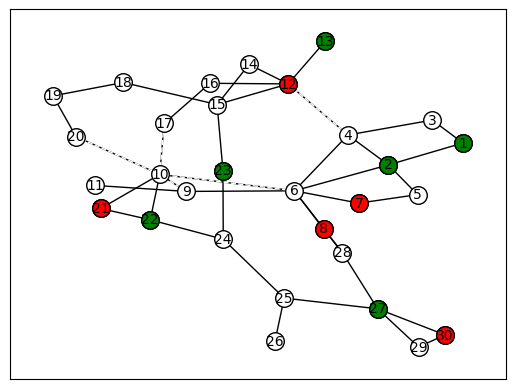

In [39]:
import visual

def plot_graph(G):
    pos = nx.layout.fruchterman_reingold_layout(G)
    options={
        'linewidths': 1,
        'edgecolors': 'black',
        'node_size': 160
    }
    nx.draw_networkx_nodes(G, pos, bus_data['bus_i'], node_color='white', **options)
    nx.draw_networkx_nodes(G, pos, CLs, node_color='red', **options)
    nx.draw_networkx_nodes(G, pos, DERs, node_color='green', **options)
    nx.draw_networkx_edges(G, pos, G.edges)
    nx.draw_networkx_edges(G, pos, [edge for edge in G.edges if status[edge] == 0], edge_color = 'white', style='dashed')
    nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=10)
    plt.show()
plot_graph(G)
visual.interactive_graph(G, CLs, DERs)

#### Simulating Contingency:
`Generator at bus 8 and Switch in the line between bus 2 and 4, 13 and 14 is faulted resulting in islanding of critical load at bus 4 and 9.`

In [40]:
line_data = line_data.drop(31)
grid['branch'] = line_data.values
line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.02,0.06,0.03,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
1,1,3,0.05,0.19,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
2,2,4,0.06,0.17,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
3,3,4,0.01,0.04,0.00,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
4,2,5,0.05,0.20,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
5,2,6,0.06,0.18,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
6,4,6,0.01,0.04,0.00,90.0,90.0,90.0,0.0,0.0,1,-360.0,360.0
7,5,7,0.05,0.12,0.01,70.0,70.0,70.0,0.0,0.0,1,-360.0,360.0
8,6,7,0.03,0.08,0.01,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
9,6,8,0.01,0.04,0.00,32.0,32.0,32.0,0.0,0.0,1,-360.0,360.0


Visualizing the network after contingency

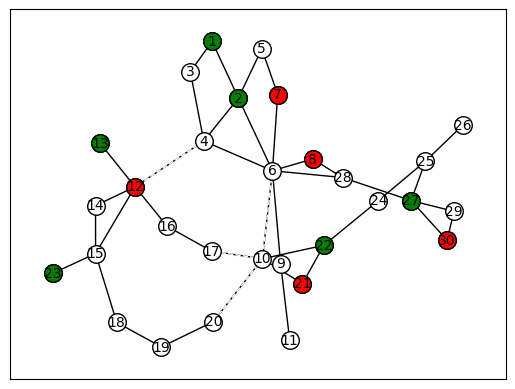

In [41]:
G, status = utils.make_graph(line_data)
plot_graph(G)

Power flow analysis of the network after contingency

In [42]:
try:
    pf_res, success = runpf(grid)
    print('Power flow converged') if success else print('Power flow did not converge')
except:
    print('Power flow did not converge')

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power did not converge in 10 iterations.

Did not converge (0.01 seconds)

|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0         -95.0 to 405.9
Generators         6     On-line Capacity       335.0         -95.0 to 405.9
Committed Gens     6     Generation (actual)    191.5             103.2
Loads             20     Load                   189.2             107.2
  Fixed           20       Fixed                189.2             107.2
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          40     Losses (I^2 * Z)         3.46             11.04
Transformers       0

### Finding Networks to restore the islanded critical node

Finding all simple paths from each critical load to each source

In [43]:
path_list = utils.find_path_list(G, CLs, DERs)

All possible path combination calculation

In [44]:
FNs, raw_combs = utils.path_combinations(path_list)

### Calculating parameters to measure resiliency of possible network

Calculation of Parameter matrix

In [45]:
id = range(len(FNs))
rsl = params.ratio_source_load(FNs, CLs, DERs)
ops = params.switch_ops(FNs, status)
cen = params.agg_centrality(FNs)
obs = params.overlapping_branches(FNs)
apl = params.avg_path_length(raw_combs)

df = pd.DataFrame(np.array([id, rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
df.index = ['id', 'rsl', 'ops', 'cen', 'obs', 'apl']
df = df.T
df = df.astype({'id': int})
print(df)

            id       rsl  ops       cen       obs  apl
FN1          0  2.500000  2.0  0.163636  0.470588  3.4
FN2          1  2.500000  2.0  0.151515  0.444444  3.6
FN3          2  2.500000  2.0  0.166667  0.312500  3.2
FN4          3  2.500000  2.0  0.153846  0.294118  3.4
FN5          4  2.500000  2.0  0.151515  0.444444  3.6
...        ...       ...  ...       ...       ...  ...
FN25196  25195  1.666667  3.0  0.111111  0.052632  3.8
FN25197  25196  2.500000  2.0  0.166667  0.142857  2.8
FN25198  25197  2.500000  2.0  0.153846  0.133333  3.0
FN25199  25198  2.500000  2.0  0.166667  0.076923  2.6
FN25200  25199  2.500000  2.0  0.153846  0.071429  2.8

[25200 rows x 6 columns]


Calculation of weighted mean and resiliency

In [46]:
df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
df['resiliency'] = np.exp(-df['wtd_mean'])
print(df.sort_values('resiliency', ascending=False))

            id   rsl  ops       cen       obs  apl  wtd_mean  resiliency
FN2197    2196  1.25  0.0  0.115385  0.000000  1.8  0.830769    0.435714
FN2365    2364  1.25  0.0  0.109890  0.000000  2.0  0.880495    0.414578
FN2198    2197  1.25  0.0  0.109890  0.000000  2.0  0.880495    0.414578
FN2195    2194  1.25  0.0  0.109890  0.000000  2.0  0.880495    0.414578
FN1847    1846  1.25  0.0  0.128205  0.000000  2.0  0.881410    0.414198
...        ...   ...  ...       ...       ...  ...       ...         ...
FN15424  15423  2.50  8.0  0.117647  0.515152  6.6  3.734670    0.023881
FN7724    7723  2.50  8.0  0.117647  0.515152  6.6  3.734670    0.023881
FN7023    7022  2.50  8.0  0.116667  0.575758  6.6  3.749773    0.023523
FN4574    4573  2.50  8.0  0.116667  0.575758  6.6  3.749773    0.023523
FN7024    7023  2.50  8.0  0.110294  0.558824  6.8  3.795221    0.022478

[25200 rows x 8 columns]


Comparing line data before and after switching to the suggested network

In [47]:
for network in FNs:
    tmp_line = line_data
    for u, v in network:
        tmp_line.loc[(tmp_line.fbus == u) & (tmp_line.tbus == v), 'status'] = 1
        tmp_line.loc[(tmp_line.fbus == v) & (tmp_line.tbus == u), 'status'] = 1
    grid['branch'] = tmp_line.values
    pf_res, success = runpf(grid)
    if success:
        print(line_data[['fbus', 'tbus', 'r', 'x', 'status']])
        line_data = tmp_line
        break
print('-----------------------------------------------------------', '\n')
print(line_data[['fbus', 'tbus', 'r', 'x', 'status']])

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power flow converged in 4 iterations.

Converged in 0.01 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0         -95.0 to 405.9
Generators         6     On-line Capacity       335.0         -95.0 to 405.9
Committed Gens     6     Generation (actual)    192.2             101.9
Loads             20     Load                   189.2             107.2
  Fixed           20       Fixed                189.2             107.2
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          40     Losses (I^2 * Z)         3.02             10.45
Transformers       0     Branc

Visualizing network having highest resiliency with operation feasibility

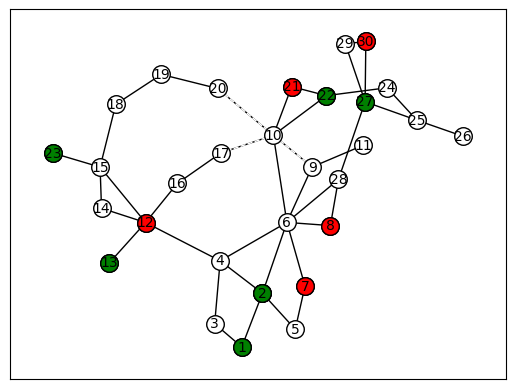

In [49]:
G, status = utils.make_graph(line_data)
plot_graph(G)

Area 2 successfully connected to main grid